In [46]:
pip install pandas-datareader

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [104]:
# Load libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Time series models
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:

pip install keras

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
stk_tickers =["MSFT","IBM","GOOGL"]
ccy_tickers = ["DEXJPUS","DEXUSUK"]
idx_tickers = ["SP500","DJIA","VIXCLS"]

In [50]:
stk_data = web.DataReader(stk_tickers,"yahoo")
ccy_data = web.DataReader(ccy_tickers,"fred")
idx_data = web.DataReader(idx_tickers,"fred")

ValueError: Index contains duplicate entries, cannot reshape

In [51]:
stk_data

Attributes Adj Close                     Close                      High  \
Symbols         MSFT      IBM    GOOGL    MSFT      IBM    GOOGL    MSFT   
Date                                                                       
2017-03-06    59.995  136.613   847.27   64.27  172.533   847.27   64.56   
2017-03-07    60.116  136.545   851.15   64.40  172.447   851.15   64.78   
2017-03-08    60.667  135.841   853.64   64.99  171.558   853.64   65.08   
2017-03-09    60.424  134.122   857.84   64.73  169.388   857.84   65.20   
2017-03-10    60.611  134.614   861.41   64.93  170.010   861.41   65.26   
...              ...      ...      ...     ...      ...      ...     ...   
2022-02-25   297.310  124.180  2689.19  297.31  124.180  2689.19  297.63   
2022-02-28   298.790  122.510  2701.14  298.79  122.510  2701.14  299.14   
2022-03-01   294.950  121.350  2681.23  294.95  121.350  2681.23  299.97   
2022-03-02   300.190  123.860  2691.43  300.19  123.860  2691.43  301.47   
2022-03-03   295.920  125.930  2677.99  295.92  125.930  2677.99  303.13   

Attributes                       Low                      Open           \
Symbols         IBM    GOOGL    MSFT      IBM    GOOGL    MSFT      IBM   
Date                                                                      
2017-03-06  173.031   848.94   63.81  171.673   841.17   63.97  171.816   
2017-03-07  173.317   853.33   64.19  172.275   845.52   64.19  172.763   
2017-03-08  172.992   856.93   64.25  171.415   851.25   64.26  172.801   
2017-03-09  171.367   860.71   64.48  168.145   852.67   65.19  171.272   
2017-03-10  171.597   864.23   64.75  169.618   857.61   65.11  170.373   
...             ...      ...     ...      ...      ...     ...      ...   
2022-02-25  124.260  2705.43  291.65  121.450  2635.03  295.14  122.050   
2022-02-28  123.390  2715.03  293.00  121.040  2651.85  294.31  122.210   
2022-03-01  123.390  2725.11  292.15  120.700  2664.37  296.40  122.670   
2022-03-02  124.640  2705.25  293.70  121.800  2661.43  295.36  122.590   
2022-03-03  126.665  2728.79  294.05  124.235  2661.02  302.89  124.960   

Attributes              Volume                        
Symbols       GOOGL       MSFT        IBM      GOOGL  
Date                                                  
2017-03-06   846.86  1.875e+07  3.352e+06  1.048e+06  
2017-03-07   847.26  1.852e+07  3.118e+06  1.039e+06  
2017-03-08   853.12  2.151e+07  3.721e+06  1.029e+06  
2017-03-09   853.69  1.985e+07  5.695e+06  1.348e+06  
2017-03-10   862.70  1.954e+07  3.243e+06  1.337e+06  
...             ...        ...        ...        ...  
2022-02-25  2671.04  3.255e+07  4.461e+06  1.820e+06  
2022-02-28  2661.00  3.459e+07  6.755e+06  1.939e+06  
2022-03-01  2697.57  3.122e+07  4.873e+06  1.325e+06  
2022-03-02  2692.56  3.187e+07  4.891e+06  1.176e+06  
2022-03-03  2720.20  2.731e+07  5.089e+06  1.230e+06  

[1259 rows x 18 columns]

In [52]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-03-06,2375.31,20954.34,11.24
2017-03-07,2368.39,20924.76,11.45
2017-03-08,2362.98,20855.73,11.86
2017-03-09,2364.87,20858.19,12.30
2017-03-10,2372.60,20902.98,11.66
...,...,...,...
2022-02-25,4384.65,34058.75,27.59
2022-02-28,4373.94,33892.60,30.15
2022-03-01,4306.26,33294.95,33.32


In [53]:
(stk_data.loc[:,("Adj Close","MSFT")]).describe()

count    1259.000
mean      159.402
std        79.523
min        59.939
25%        94.396
50%       134.292
75%       214.308
max       342.402
Name: (Adj Close, MSFT), dtype: float64

In [54]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).\
shift(-return_period)
Y.name = Y.name[-1]+'_pred'

In [55]:
Y.name=Y.name[-1]+ "_pred"

In [56]:
Y.name

'd_pred'

In [57]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period,
                                                                             return_period*3,
                                                                             return_period*6,
                                                                             return_period*12]],axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']

X = pd.concat([X1,X2,X3,X4], axis=1)
dataset = pd.concat([X,Y],axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:,Y.name]
X = dataset.loc[:,X.columns]

In [58]:
X

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-05-31,0.004,0.017,-0.012,-2.322e-03,3.077e-03,-1.794e-04,0.038,0.017,0.017,0.072,0.089
2017-06-08,-0.004,0.016,-0.010,3.484e-03,1.534e-03,1.812e-03,0.027,0.026,0.064,0.065,0.116
2017-06-15,0.014,-0.045,0.005,-1.330e-02,-5.466e-04,8.339e-03,0.070,-0.029,0.016,0.018,0.091
2017-06-22,0.001,0.017,0.006,-8.574e-03,8.383e-04,1.749e-03,-0.039,0.005,0.002,0.019,0.079
2017-06-29,-0.002,-0.041,0.009,2.535e-02,-6.098e-03,-5.166e-03,0.088,-0.026,-0.049,0.015,0.047
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21,-0.041,-0.061,-0.001,-7.932e-03,-5.849e-02,-4.693e-02,0.408,-0.029,-0.136,-0.124,-0.045
2022-01-31,0.036,0.034,0.012,-5.951e-04,2.362e-02,2.208e-02,-0.186,0.048,-0.010,-0.044,-0.070
2022-02-07,0.027,0.028,-0.001,6.970e-03,-7.040e-03,-1.160e-03,-0.083,-0.033,-0.030,-0.106,-0.093
2022-02-14,-0.041,-0.027,0.005,-1.257e-03,-1.850e-02,-1.507e-02,0.215,-0.020,-0.005,-0.131,-0.139


### Exploratory data analysis


### Desccriptiv Analysis

In [59]:
pd.set_option("precision", 3)

In [60]:
dataset.describe()

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,d_pred
count,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,1.818e-04,0.003,2.756e-05,-4.806e-04,0.001,0.001,0.009,0.006,0.018,0.038,0.081,0.006
std,3.771e-02,0.037,8.897e-03,1.220e-02,0.026,0.028,0.177,0.033,0.050,0.065,0.074,0.034
min,-1.683e-01,-0.159,-3.293e-02,-5.492e-02,-0.162,-0.190,-0.559,-0.145,-0.165,-0.288,-0.159,-0.153
25%,-1.756e-02,-0.014,-5.348e-03,-6.905e-03,-0.008,-0.008,-0.087,-0.013,-0.008,0.004,0.043,-0.013
50%,2.102e-03,0.007,4.806e-04,-1.442e-03,0.004,0.004,-0.002,0.008,0.017,0.041,0.085,0.007
75%,1.734e-02,0.023,5.467e-03,6.167e-03,0.015,0.014,0.092,0.024,0.052,0.076,0.130,0.026
max,1.304e-01,0.134,3.800e-02,5.121e-02,0.098,0.121,0.910,0.100,0.186,0.285,0.283,0.100


### 3.2 Data visualization.

In [61]:
import seaborn as sns
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

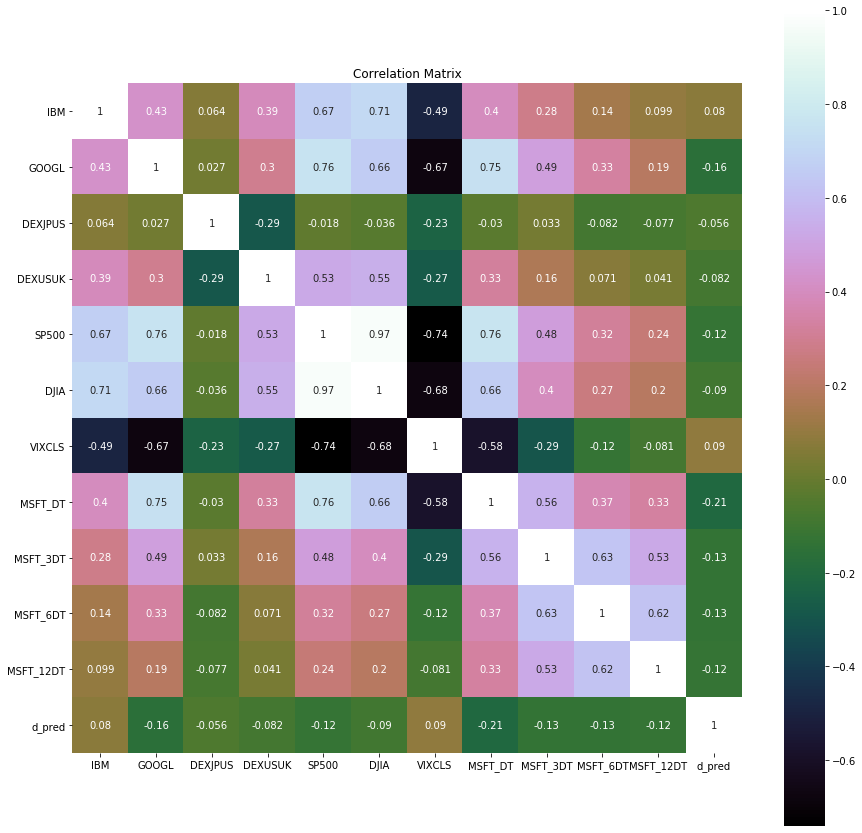

In [62]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

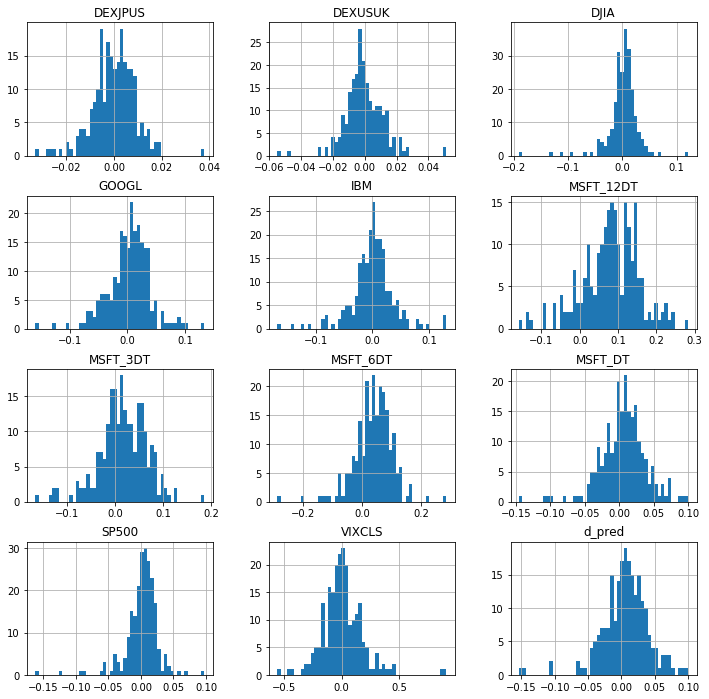

In [63]:
dataset.hist(bins=50,figsize=(12,12));

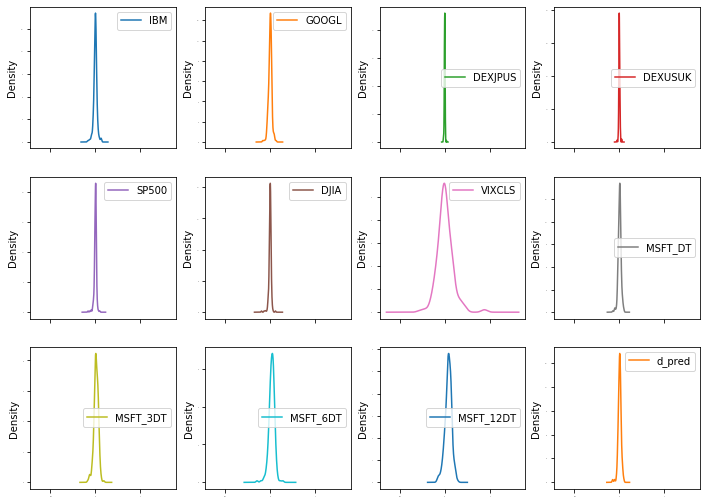

In [64]:
dataset.plot(kind="density",figsize=(12,12),subplots=True,fontsize=1,sharex=True, layout =(4,4));

<Figure size 864x864 with 0 Axes>

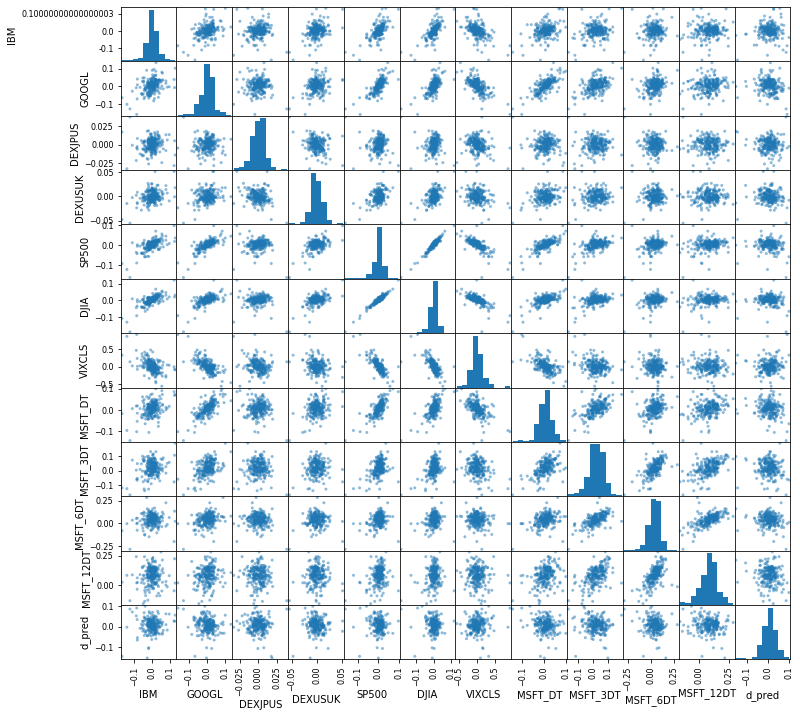

In [65]:
pyplot.figure(figsize=(12,12))
scatter_matrix(dataset,figsize=(12,12));

### 3.3 Time Series Analysis


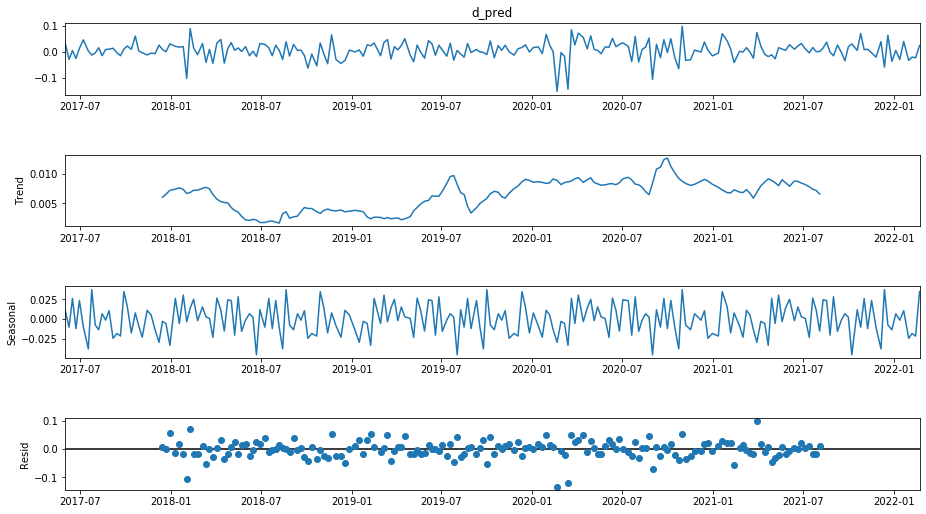

In [66]:
res = sm.tsa.seasonal_decompose(Y,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

### 4.2. Feature Selection


In [67]:
bestfeature = SelectKBest(k=5,score_func=f_regression)
fit = bestfeature.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns =["Specs","Score"]
featureScores.nlargest(10,"Score")

,Specs,Score
7,MSFT_DT,10.084
1,GOOGL,5.840
9,MSFT_6DT,4.134
8,MSFT_3DT,3.786
10,MSFT_12DT,3.500
4,SP500,3.372
6,VIXCLS,1.838
5,DJIA,1.809
3,DEXUSUK,1.497
0,IBM,1.440


5. Evaluate Algorithms and Models



In [68]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train,X_test = X[:train_size],X[train_size:]
Y_train,Y_test = Y[:train_size],Y[train_size:]

### 5.2. Test Options and Evaluation Metrics


In [69]:
num_folds = 10
seed = 7
scoring ="neg_mean_squared_error"

### 5.3. Compare Models and Algorithms

In [70]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RID',Ridge()))
              
models.append(('MLP', MLPRegressor()))

# Boosting methods
              
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
              
# Bagging methods
              
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [71]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    print("%s:%f (%f) %f %f" % (name,cv_results.mean(),cv_results.std(),train_result,test_result))
    
    
   

LR:0.001327 (0.001092) 0.001041 0.001260
LASSO:0.001260 (0.001007) 0.001257 0.000805
EN:0.001260 (0.001007) 0.001257 0.000805
KNN:0.001476 (0.001180) 0.000968 0.001097
CART:0.002677 (0.001590) 0.000000 0.001672
SVR:0.002554 (0.000819) 0.002492 0.002230
RID:0.001267 (0.001074) 0.001189 0.000818
MLP:0.004111 (0.005119) 0.001273 0.000995
ABR:0.001410 (0.001148) 0.000595 0.000936
GBR:0.001653 (0.001343) 0.000083 0.001054
RFR:0.001510 (0.001291) 0.000234 0.000844
ETR:0.001543 (0.001366) 0.000000 0.000994


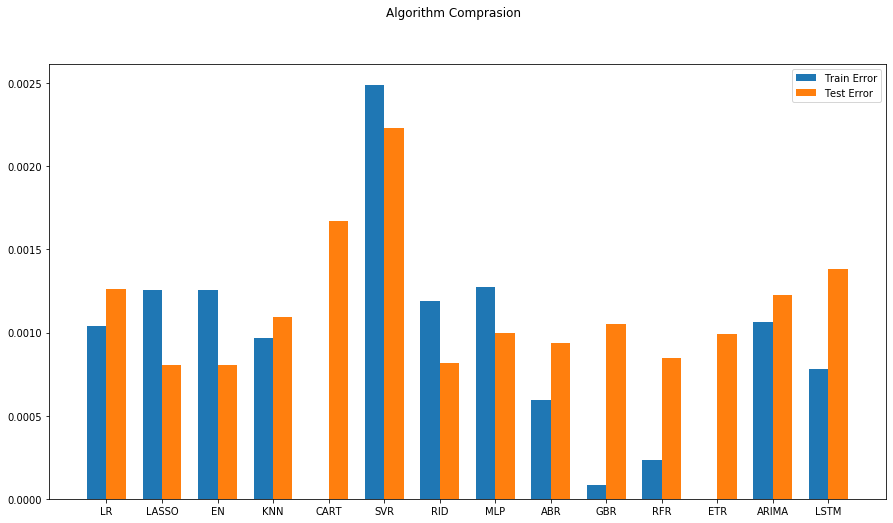

In [96]:
def plot_errors():
    fig = pyplot.figure()
    ind = np.arange(len(names))
    width = 0.35

    fig.suptitle("Algorithm Comprasion")
    ax = fig.add_subplot(111)
    pyplot.bar(ind - width/2, train_results,width=width,label="Train Error")
    pyplot.bar(ind + width/2, test_results,width=width,label="Test Error")
    fig.set_size_inches(15,8)
    pyplot.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(names)
    pyplot.show()
    
plot_errors()    


### Time series Model - ARIMA model

In [74]:
X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)
                            

In [75]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [76]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.0012264783419824116

### Time series Model - LTSMC model

In [83]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [84]:
# Lstm Network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

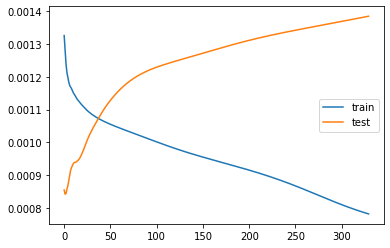

In [89]:
pyplot.plot(LSTMModel_fit.history["loss"],label="train")
pyplot.plot(LSTMModel_fit.history["val_loss"],label="test")
pyplot.legend()
pyplot.show()

In [91]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

In [92]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

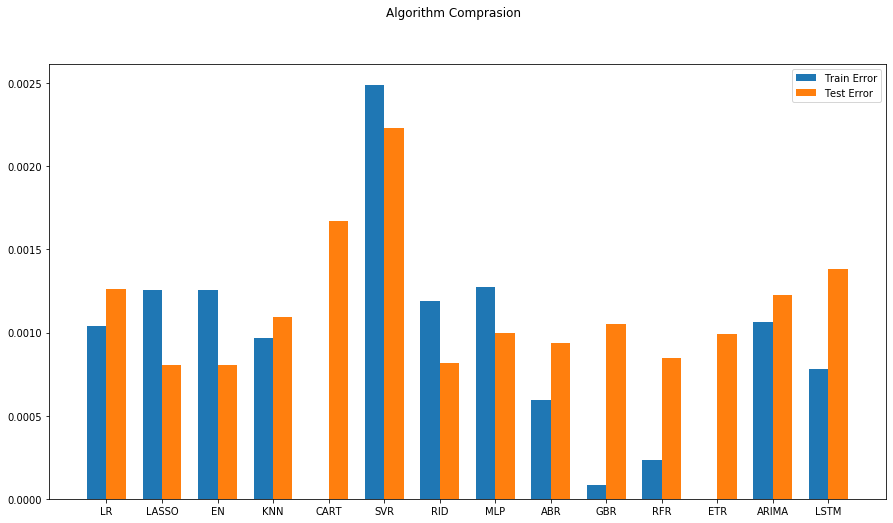

In [97]:
plot_errors()

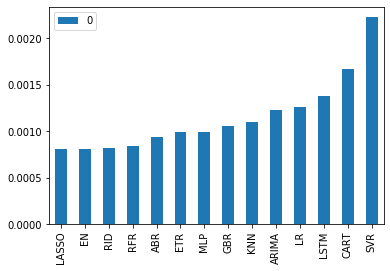

In [102]:
pd.DataFrame(test_results,index=names).sort_values(0).plot(kind="bar")

### 6. Model Tuning and Grid Search


In [105]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for es in enforce_stationarity:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))

In [106]:
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)  

ARIMA(0, 0, 0) MSE=0.0010720
ARIMA(0, 0, 1) MSE=0.0010624
ARIMA(1, 0, 0) MSE=0.0010608
ARIMA(1, 0, 1) MSE=0.0010603
ARIMA(2, 0, 0) MSE=0.0010601
ARIMA(2, 0, 1) MSE=0.0010600
Best ARIMA(2, 0, 1) MSE=0.0010600


### 7. Finalise the Model



In [108]:
modelARIMA_tuned = ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [112]:
predicted_tuned = model_fit_tuned.predict(start= tr_len -1,end=to_len-1,exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 11 and the array at index 1 has size 6